## Simple Non-Linear Regression [Engine Size vs CO2 Emmisions]

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Download dataset

In [2]:
!wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


### Load data

In [3]:
df = pd.read_csv("china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


### Explore data

In [4]:
df.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


### Plot a scatter plot to observe the relationship between X and Y

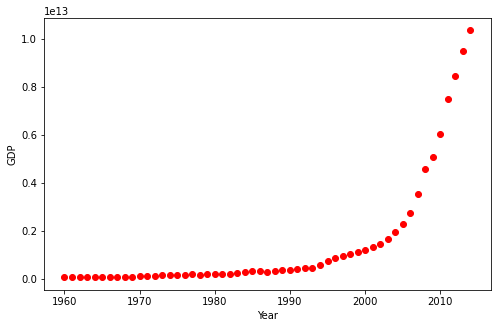

In [5]:
plt.figure(figsize=(8,5))

x_data, y_data = (df["Year"].values, df["Value"].values)

plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

The relationship appears to be logistic

### Curve of a logistic function

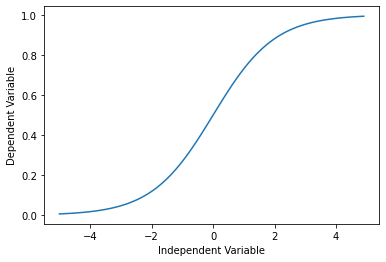

In [6]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Building model

In [7]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

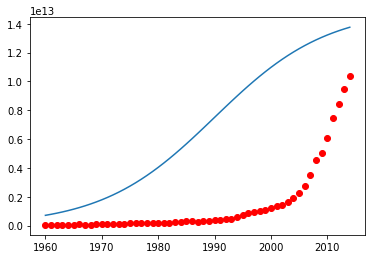

In [8]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

### Normalize data

In [9]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

### Optimize Parameters

In [10]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)

print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451712, beta_2 = 0.997207


### Plot model

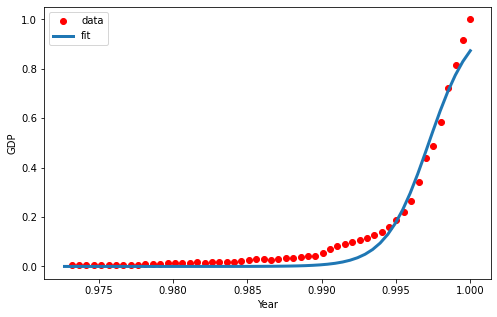

In [11]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### Splitting dataset into train (80%) and split

In [12]:
mask = np.random.rand(len(df)) < 0.8
trainX = xdata[mask]
trainY = ydata[mask]

testX = xdata[~mask]
testY = ydata[~mask]

### Build model

Fit model

In [13]:
popt, pcov = curve_fit(sigmoid, trainX, trainY)

c:\Users\chinm\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


### Print Results

In [14]:
y_ = sigmoid(testX, *popt)
print(y_)

[1.75457822e-18 2.33519732e-18 2.59944212e-18 3.33819840e-18
 3.85112459e-18 4.44286374e-18 4.77200298e-18 5.12552574e-18
 6.12819674e-18 9.40933592e-18 1.04740717e-17 1.12500190e-17]


### Evaluation

In [15]:
from sklearn.metrics import r2_score

print(f'Mean absolute error: {np.mean(np.absolute(y_ - testY))}')
print(f'Residual sum of squares (MSE): {np.mean((y_ - testY) ** 2)}')
print(f'R2-Score: {r2_score(y_ , testY)}')

Mean absolute error: 0.21448406622578384
Residual sum of squares (MSE): 0.1600061699002993
R2-Score: -1.668230014925707e+34


In [16]:
popt, pcov = curve_fit(sigmoid, testX, testY)

### Pickling

In [17]:
import pickle

with open('nlrChinGDP.pkl', 'wb') as f:
    pickle.dump((popt, pcov), f)